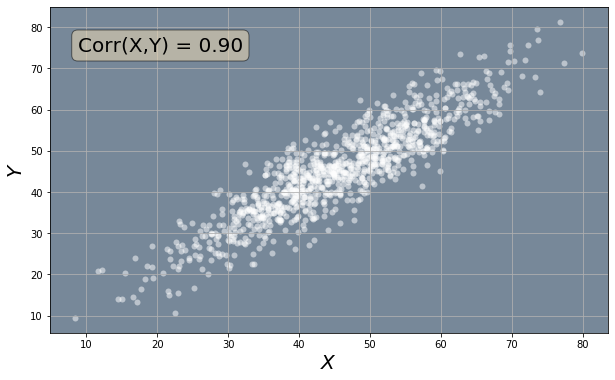

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Set the data range
data_min = 10
data_max = 80

# Set the amount of correlation. The correlation is a number in the closed interval [0,1].
corr = 0.9

# create correlated data
X_norm = utils.create_corr_data(corr, data_min, data_max)

# Plot the correlated data
utils.plot_data(X_norm, corr)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

print('\nPCA Parameters:', pca, '\n')


PCA Parameters: PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) 



In [3]:
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print('\nArray Containing all Principal Components:\n', pca.components_)
print('\nFirst Principal Components:\n', pca.components_[0])
print('\nSecond Principal Components:\n', pca.components_[1])
print('\nEigenvalues:\n', pca.singular_values_)
print('\nPercentage of Variance Explained  by Each Principal Component\n', pca.explained_variance_ratio_)


Array Containing all Principal Components:
 [[-0.70469824 -0.70950715]
 [ 0.70950715 -0.70469824]]

First Principal Components:
 [-0.70469824 -0.70950715]

Second Principal Components:
 [ 0.70950715 -0.70469824]

Eigenvalues:
 [495.51482752 114.52408204]

Percentage of Variance Explained  by Each Principal Component
 [0.94929159 0.05070841]


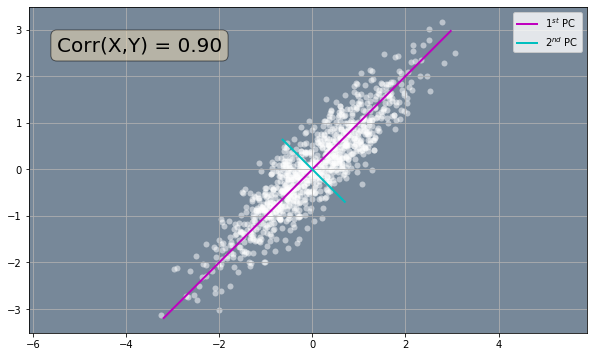

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Set the data range
data_min = 10
data_max = 80

# Set the amount of correlation. The correlation is a number in the closed interval [0,1].
corr = 0.9

# create correlated data
utils.plot_data_with_pca_comp(corr, data_min, data_max)


# Project Data

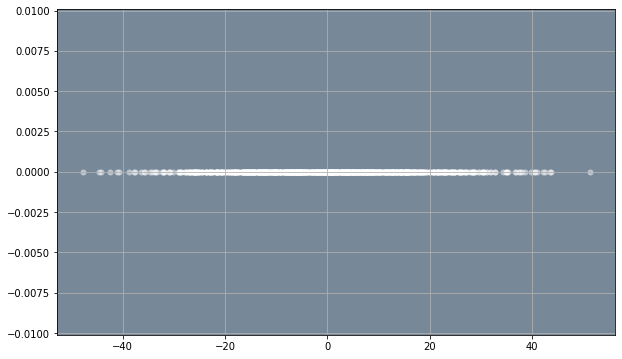

In [6]:
import numpy as np

from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

pca.fit(X_norm)

transformed_data = pca.transform(X_norm)

yvals = np.zeros(1000)

# Plot the data
plt.scatter(transformed_data, yvals, color = 'white', alpha = 0.5, linewidth = 0)
ax = plt.gca()
ax.set_facecolor('lightslategray')
plt.grid()

plt.show()

[source](https://github.com/udacity/artificial-intelligence-for-trading/blob/master/quiz/m4_multifactor_models/PCA%20Toy%20Problem/PCA%20Toy%20Problem.ipynb)

In [7]:
records = [18,8,7,2,3,6,1,1]
print(id(records))
i = 0
compare = 0
record_len = len(records)

while i < record_len:
    j = 1
    while j < record_len - i:
        if records[j] < records[j - 1]:
            compare = records[j]
            records[j] = records[j - 1]
            records[j - 1] = compare
        j+=1
    i+=1
print(id(records))
print(records)
        

2310831485448
2310831485448
[1, 1, 2, 3, 6, 7, 8, 18]


# Principal Component Analysis(PCA)
Principal component Analysis(PCA) is statistical procedure that uses an orthogonal
transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models. Moreover, PCA is an unsupervised statistical models technique used to examine the interralations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Importing standardscalar module
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)

# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

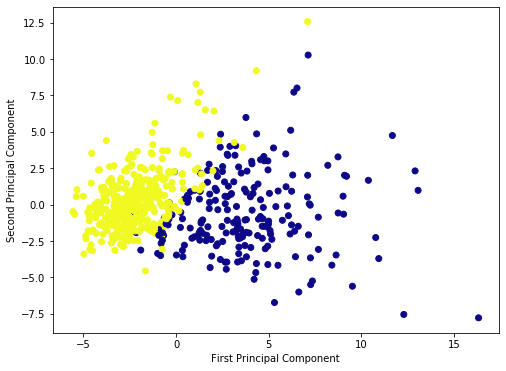

In [10]:
# giving a larger plot
plt.figure(figsize=(8,6))

plt.scatter(x_pca[:,0], x_pca[:,1], c = cancer['target'], cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [11]:
# components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

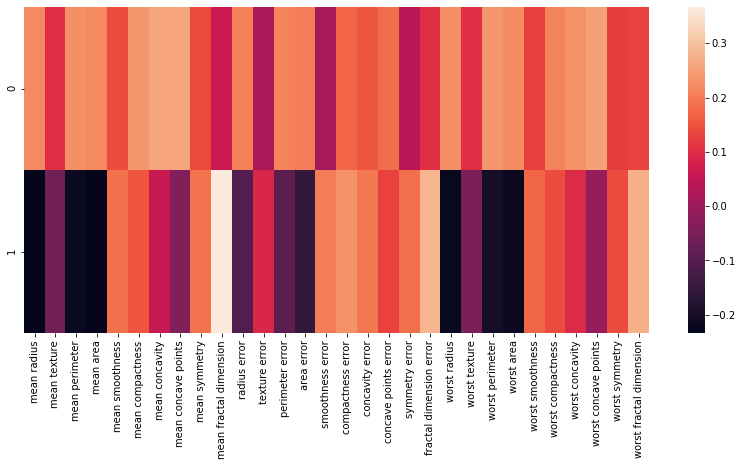

In [12]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
plt.figure(figsize =(14,6))

# plotting heatmap
sns.heatmap(df_comp)